# Open Systems
All of the examples in the previous two chapters were closed systems. The ultimate state of closed, chemically reacting systems is chemical equilibrium. Living systems are characterized by mass and energy flow across their boundaries that keep them away from equilibrium. We now discuss open systems, which allow molecules to enter and leave. Open systems ultimately reach a steady state that is often close to a homeostatic state of interest. 

**MASSpy** will be used to demonstrate some of the topics in this chapter. 

In [1]:
from mass import (
    MassModel, MassMetabolite, MassReaction, Simulation, MassSolution)
from mass.visualization import plot_time_profile, plot_phase_portrait

Other useful packages are also imported at this time.

In [2]:
import matplotlib.pyplot as plt

## Basic Concepts
There are several fundamental concepts that need to be understood when one considers open systems. We discuss the more significant ones in this section. 

### The system boundary  
Implicit in the term 'open system' is the notion of an inside and an outside, the division of the world into two domains. The separation between the two is the _system boundary,_ which thus defines what is inside a system and belongs to it, and what is outside. 

The definition of a boundary can be physical. An example of a physical boundary may be the cell wall, that clearly defines what is inside and what is outside. Similarly, the outer membrane of the mitochondria can serve as a clearly defined physical system boundary. Thus, systems can have hard, immovable boundaries or soft, flexible ones. In the latter case, the volume of the system may be changing. 

The definition of a boundary can also be virtual. For instance, we can define a pathway, such as the TCA cycle, as a system, or the amino acid biosynthetic pathways in a cell as a system. In both cases we might draw dashed lines around it on the metabolic map to indicate the system boundary. 

### Crossing the boundary: inputs and outputs  
Once a system boundary has been established, we can identify and define interactions across it. They are the _inputs_ and _outputs_ of the system. In most cases, we will be considering mass flows in and out of a system; molecules coming and going. Such flows are normally amenable to experimental determination. 

There may be other quantities crossing the system boundary. For instance, if we are considering photosynthesis, photons are crossing the system boundary providing a net influx of energy. Forces can also act on the system boundary. For instance, if the number of molecules coming into and leaving a system through a coupled transport mechanism is not balanced, then osmotic pressure may be generated across the system boundary. Cells have sodium-potassium pumps that displace an uneven number of two types of cations to deal with osmotic imbalances. 

### Perturbations and boundaries  
In most analyses of living systems, we are concerned about changes in the environment. The temperature may change, substrate availability may change, and so on. Such changes in the environment can be thought of as forcing functions to which the living system responds. These are one-way interactions, from the environment to the system. In most cases, we consider the system to be small (relative to the environment) and that the environment buffers the activities of the system. For instance, the environment may provide an infinite sink for cellular waste products. 

In other cases, the activities of the system influence the state of the environment. In batch fermentation, for example, the metabolic activities will substantially change the chemical composition of the medium during the course of the fermentation. On a global scale, we are now becoming more concerned about the impact that human activities have on the climate and the larger environment of human socio-economic activities. In such cases, there are two-way interactions between the system and the environment that need to be described. 

### Inside the boundary: the internal network  
The definition of a system boundary determines what is inside. Once we know what is inside the system, we can determine the network of chemical transformations that takes place. This network has topology and its links have kinetic properties. 

In most cases, it is hard to measure the internal state of a system. There typically are only a few non-invasive measurements available. Occasionally, there are probes that we can use to observe the internal activities. Tracers, such as $^{13}C$ atoms strategically placed in substrates, can be used to trace input to output and allow us to determine pieces of the internal state of a system. Tearing a system apart to enumerate its components is of course possible, but the system is destroyed in the process. Thus, we are most often in the situation where we cannot fully experimentally determine the internal state of a system, and may have to be satisfied with only partial knowledge. 

### From networks to system models  
Mathematical models may help us to simulate or estimate the internal state of the system. Sometimes we are able to bracket its state based on the inputs and outputs and our knowledge of the internal network. 

Full dynamic simulation requires extensive knowledge about the internal properties of a system. Detailed models that describe the dynamic state of a system require the definition of the system boundary, the inputs and outputs, the structure of the internal network, and the kinetic properties of the links in the network. We can then simulate the response of the system to various perturbations, such as changes in the environmental conditions. 

### The functional state  
Once a system model has been formulated, it can be used to compute the functional state of the system for a given set of conditions. Closed systems will eventually go to chemical equilibrium. However, open systems are fundamentally different. Due to continuous interactions with the environment, they have internal states that are either dynamic or steady. A system that has fast internal time constants relative to changes in the environment will reach a steady state, or a quasi-steady state. For a biological system, such functional states are called _homeostatic states_. Such states are maintained through energy dissipation. The flow of energy in has to exceed the energy leaving the system. This difference allows living systems to reach a functional homeostatic state. 

![Figure-6-1](../images/Ch6/Figure-6-1.png)

**Figure 6.1:** Open systems. (a) example production of ATP from pyruvate by mitochondria (Prepared by Nathan Lewis). (b) Basic definitions associated with an open system.

## Reversible reaction in an Open Environment
In an open environment, the simple reaction of Eq. (4.1)  has an inflow $(b_1)$ of $x_1$ and an outflow $(b_2)$ of $x_2$: 

$$\begin{equation} \stackrel{b_1}{\rightarrow} x_1 \underset{v_{-1}}{\stackrel{v_1}{\rightleftharpoons}} x_2 \stackrel{b_2}{\rightarrow} \tag{6.1} \end{equation}$$

The input is fixed by the environment and there is a first-order rate for the product to leave the system and thus we have 

$$\begin{equation} b_1 = \text{constant and}\ b_2 = k_2x_2 \end{equation}$$

This defines the system boundary, and the inputs and outputs. 

The stoichiometric matrix is 

$$\begin{equation} \textbf{S} = \begin{pmatrix} {1} & {-1} & {1} & {0} \\ {0} & {1} & {-1} & {-1} \\ \end{pmatrix} \end{equation}$$
$$\tag{6.2}$$

where $\textbf{x} = (x_1,\  x_2)$ and $\textbf{v} = (b_1, \ k_1x_1, \  k_{-1}x_2, \  k_2x_2)$ The stoichiometric matrix has a rank of 2 and is thus a two-dimensional dynamic system. The differential equations that will need to be solved are: 

$$\begin{equation} \frac{dx_1}{dt} = b_1 - k_1x_1 + k_{-1}x_2, \ \frac{dx_2}{dt} = k_1x_1 - k_{-1}x_2 - k_2x_2 \tag{6.3} \end{equation}$$

There are no conservation quantities. 

### The steady states  
There are three properties of the steady state of interest. We can find first the steady state fluxes and second the steady state concentrations. Third, we can determine the difference between the steady state and the equilibrium state of this open system. 

#### Steady state fluxes:  
The steady state of the fluxes is given by 

$$\begin{equation} \textbf{Sv}_{ss} = 0 \tag{6.4} \end{equation}$$

and thus $\textbf{v}_{ss}$ resides in the null space of $\textbf{S}$. For this matrix, the null space is two dimensional; $\text{Dim}(\text{Null}(\textbf{S}))=n-r=4-2=2$, where $n=4$ is the number of fluxes and the rank is $r=2$. The null space is spanned by two pathway vectors: (1,1,0,1) and (0,1,1,0). The former is the path through the system while the latter corresponds to the reversible reaction. These are known as type 1 and type 3 extreme pathways, respectively (_Systems Biology: Properties of Reconstructed Networks_). All steady state flux states of the system are a non-negative combination of these two vectors. 

$$\begin{align} \textbf{v}_{ss} &= (b_1, \ k_1x_{1, ss}, \ k_{-1}x_{2, ss}, \ k_2x_{2, ss})  \tag{6.5} \\ &= a(1, 1, 0, 1) + b(0, 1, 1, 0), \ a \geq 0, \ b \geq 0 \tag{6.6} \end{align}$$

#### Steady state concentrations:  
The concentrations in the steady state can be evaluated from 

$$\begin{equation} 0 = b_1 - k_1x_1 + k_{-1}x_2, \ 0 = k_1x_1 - k_{-1}x_2 - k_2x_2 \end{equation}$$ $$\tag{6.7}$$

If we add these equations we find that $x_{2, ss} = b_1 / k_2$. This concentration can then be substituted into either of the two equations to show that $x_{1, ss} = (1 + k_{-1}/k_2)(b_1/k_1)$. Thus, the steady state concentration vector is 

$$\begin{equation} \textbf{x}_{ss} = \begin{pmatrix} {x_{1, ss}} \\ {x_{2, ss}} \end{pmatrix} = (\frac{b_1}{k_2})\begin{pmatrix} {\frac{k_2 + k_{-1}}{k_1}} \\ {1} \end{pmatrix} \end{equation}$$ $$\tag{6.8}$$

These steady state concentrations can be substituted into the steady state flux vector to get 

$$\begin{align} \textbf{v}_{ss} &= b_1(1, 1+(\frac{k_{-1}}{k_2}), \ (\frac{k_{-1}}{k_2}), \ 1)  \tag{6.9} \\ &= a(1, 1, 0, 1) + b(0, 1, 1, 0), \ a = b_1, \ b = (\frac{b_1k_{-1}}{k_2}) \end{align}$$

Therefore, the steady state flux distribution is a summation of the straight through pathway and the discounted flux through the reversible reaction. The key quantity is $k_{-1} / k_2$ that measures the relative rate of $x_2$ reacting back to form $x_1$ versus the rate at which it leaves the system. 

#### The distance from the equilibrium state:  
The difference between the steady state and the equilibrium state can be measured by: 

$$\begin{equation} \frac{x_{2, ss}/x_{1, ss}}{x_{2, eq}/x_{1, eq}} = \frac{1}{1 + k_2/k_{-1}} \stackrel{k_2 << k_{-1}}{\longrightarrow} 1 \tag{6.11} \end{equation}$$

Thus, when $k_2 << k_{-1}$, the steady state approaches the equilibrium state (recall that $(x_{2, ss}/x_{1, ss})/(x_{2, eq}/x_{1, eq}) = \Gamma/K_{eq}$ Section 2.2). If the exchange with the environment is slow relative to the internal reaction rates, the internal system approaches that of an equilibrium state. 

### Dynamic states for reversible reactions
The dynamic states are computed from the dynamic mass balances for a given condition. We are interested in two dynamic states: the approach to the steady state, and the response to a change in the input flux, $b_1$

#### A two-phase transient response:  
Simulation of this system with an input rate of $b_1 = 0.01$ and a slow removal rate, $k_2 = 0.1$, from an initial state of $x_1(0) = 1.0$ and $x_2(0) = 0$ is shown in Figure 6.2. There are two discernible time scales: a rapid motion of the equilibrating reaction, and a slow removal of $x_2$ from the system, Figure 6.2b. A phase portrait shows a rapid movement along a line with a negative slope of 1, showing the existence of a conservation quantity $(x_1 + x_2)$ on a fast time scale, followed by a slow motion down a quasi-equilibrium line with a slope of 1/2 to a steady state point. Note the difference from Figure 4.4c. 

In [3]:
# Create MassModel
model = MassModel('Linear_Reversible_Open')
# Generate the MassMetabolites 
x1 = MassMetabolite("x1")
x2 = MassMetabolite("x2")

# Generate the MassReactions 
b1 = MassReaction("b1", reversible=False)
v1 = MassReaction("v1")
b2 = MassReaction("b2", reversible=False)
# Add metabolites to the reaction, add reaction to the model
b1.add_metabolites({x1: 1})
v1.add_metabolites({x1: -1, x2: 1})
b2.add_metabolites({x2: -1})
model.add_reactions([b1, v1, b2])
# Set parameters
b1.kf = 0.01
v1.kf, v1.kr = (1, 2)
b2.kf = 0.1

# Set initial conditions for model
x1.ic = 1
x2.ic = 0
# Utilize type 2 rate law for kf and kr parameters defined
model.get_rate_expressions(rate_type=2, update_reactions=True)

# Set a custom rate for b1 to remove substrate concentration dependence
model.add_custom_rate(reaction=b1, custom_rate=b1.kf_str)

Set parameter Username


In [4]:
t0 = 0
tf = 150

sim = Simulation(model, verbose=True)
conc_sol, flux_sol = sim.simulate(model, time=(t0, tf),
                                  interpolate=True,
                                  verbose=True)

Successfully loaded MassModel 'Linear_Reversible_Open' into RoadRunner.
Getting time points
Setting output selections
Setting simulation values for 'Linear_Reversible_Open'
Simulating 'Linear_Reversible_Open'
Simulation for 'Linear_Reversible_Open' successful
Adding 'Linear_Reversible_Open' simulation solutions to output
Updating stored solutions


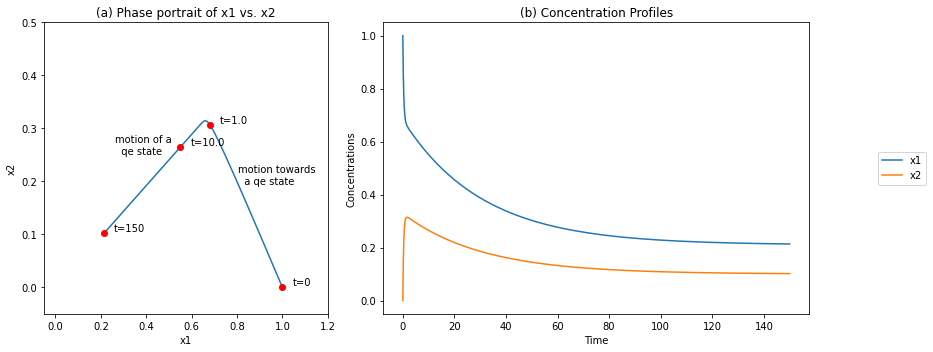

In [5]:
fig_6_2 = plt.figure(figsize=(13, 5))
gs = fig_6_2.add_gridspec(nrows=1, ncols=2, width_ratios=[1, 1.5])

ax1 = fig_6_2.add_subplot(gs[0, 0])
ax2 = fig_6_2.add_subplot(gs[0, 1])

plot_phase_portrait(
    conc_sol, x=x1, y=x2, ax=ax1,
    xlabel=x1.id, ylabel=x2.id, xlim=(-.05, 1.2), ylim=(-.05, 0.5),
    title=("(a) Phase portrait of x1 vs. x2", {"size": "large"}),
    annotate_time_points=[t0, 1e0, 1e1, tf],
    annotate_time_points_color=["red"],
    annotate_time_points_labels=True);

ax1.annotate(
    'motion towards\n  a qe state', 
    xy=(conc_sol[x1.id](0.5), conc_sol[x2.id](0.5)), 
    xytext=(conc_sol[x1.id](0.3), conc_sol[x2.id](0.3)));

ax1.annotate(
    'motion of a\n  qe state', 
    xy=(conc_sol[x1.id](tf), conc_sol[x2.id](tf)), 
    xytext=(conc_sol[x1.id](tf) + 0.05, conc_sol[x2.id](tf) + 0.15));

plot_time_profile(
    conc_sol, ax=ax2, legend="right outside", 
    xlabel="Time", ylabel="Concentrations",
    title=("(b) Concentration Profiles", {"size": "large"}));
fig_6_2.tight_layout()

**Figure 6.2:** The concentration time profiles for the reaction system $\rightarrow x_1 \rightleftharpoons x_2 \rightarrow$ for $k_1 = 1$, $k_{-1} = 2$, $x_1(0) = 0$, and $b_1 = 0.01$. (a) The phase portrait of $x_1$ and $x_2$ (b) The concentrations as a function of time.

The same pools can be formed as defined in Eq. (4.9):

$$\begin{equation}\begin{pmatrix} {p_1} \\ {p_2} \end{pmatrix} = \begin{pmatrix} {1} & {-1/K_1} \\ {1} & {1} \end{pmatrix} = \begin{pmatrix} {x_1} \\ {x_2} \end{pmatrix} \end{equation}$$
$$\tag{6.12}$$

This matrix can be used to post-process the concentrations and the results can be graphed, Figure 6.3. The pool transformation leads to dynamic decoupling and is clearly illustrated in this figure. The disequilibrium pool relaxes very quickly, while the conservation pool moves slowly, Figure 6.3b. The phase portrait formed by the pools thus has an L shape (Figure 6.3a), illustrating the dynamic decoupling. Note that: 

* There is first a vertical motion where $x_1 + x_2$ is essentially a constant, followed by a slow horizontal motion where the disequilibrium variable $x_1 - x_2 /K_1$ is a constant. 

* These two separate motions correspond to forming the pathways found in the steady state. 

* The disequilibrium aggregate is not zero, as it is forced away from equilibrium by the input and settling in a steady state. 

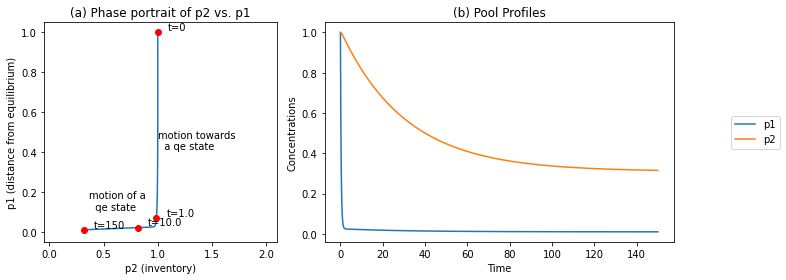

In [6]:
# Define pools
pools = ["x1 - x2 / Keq_v1", "x1 + x2"]
for i, equation_str in enumerate(pools):
    pool_id = "p" + str(i + 1)
    conc_sol.make_aggregate_solution(
        pool_id, equation=equation_str, 
        parameters={v1.Keq_str: v1.kf/v1.kr}, update=True)

fig_6_3 = plt.figure(figsize=(11, 4))
gs = fig_6_3.add_gridspec(nrows=1, ncols=2, width_ratios=[1, 1.5])

ax1 = fig_6_3.add_subplot(gs[0, 0])
ax2 = fig_6_3.add_subplot(gs[0, 1])

plot_phase_portrait(
    conc_sol, x="p2", y="p1", ax=ax1,
    xlabel="p2 (inventory)", ylabel="p1 (distance from equilibrium)",
    xlim=(-.05, 2.1), ylim=(-.05, 1.05),
    title=("(a) Phase portrait of p2 vs. p1", {"size": "large"}),
    annotate_time_points=[t0, 1e0, 1e1, tf],
    annotate_time_points_color=["red"],
    annotate_time_points_labels=True);

ax1.annotate(
    'motion towards\n  a qe state', 
    xy=(conc_sol["p2"](0.5), conc_sol["p1"](0.5)), 
    xytext=(conc_sol["p2"](0.3), conc_sol["p1"](0.3)));

ax1.annotate(
    'motion of a\n  qe state', 
    xy=(conc_sol["p2"](tf), conc_sol["p1"](tf)), 
    xytext=(conc_sol["p2"](tf) + 0.05, conc_sol["p1"](tf) + 0.1));

plot_time_profile(
    conc_sol, observable=["p1", "p2"], ax=ax2, legend="right outside", 
    xlabel="Time", ylabel="Concentrations",
    title=("(b) Pool Profiles", {"size": "large"}));
fig_6_3.tight_layout()

**Figure 6.3:** The time profiles of the pools involved in reaction system $\rightarrow x_1 \rightleftharpoons x_2 \rightarrow$ for the same conditions as in Figure 6.2. (a) The phase portrait of $p_2$ and $p_1$. (b) The pools as a function of time.

#### External disturbance:  
The previous simulation represents a biologically unrealistic situation. An internal concentration cannot suddenly deviate from its value independent of what else happens in the system. A much more realistic situation is one where we start out at a steady state and an environmental change is observed. In our case, the only environmental parameter is $b_1$. 

In Figure 6.4 we change the input flux, $b_1$, from 0.01 to 0.02 at time zero, when the system is initially in a steady state (the endpoint in Figure 6.4). We make three observations:  

* We see that the fast motion is not activated. 

* The 'inventory' or the pool of $x_1 + x_2$ moves from one steady state to another. It increases, as the forcing function was stepped up. 

* The 'distance from equilibrium' 

$$\begin{equation} x_{1, ss} - \frac{x_{2, ss}}{K_1} = x_{1, ss} - \frac{x_{2, ss}}{x_{2, eq}/x_{1, eq}} = x_{1, ss}(1 - \frac{\Gamma}{K_1}) \tag{6.13} \end{equation}$$

is close to zero in both steady states. The higher throughput, however, does push the system farther from equilibrium. 

In [7]:
# Ensure model starts simulation at a steady state.
sim.find_steady_state(model, strategy="simulate", update_values=True, verbose=True);

# Simulate model with disturbance from steady state
conc_sol, flux_sol = sim.simulate(
    model, time=(t0, tf), perturbations={"kf_b1": 0.02},
    interpolate=True, verbose=True)

# Determine pools
for i, equation_str in enumerate(pools):
    pool_id = "p" + str(i + 1)
    conc_sol.make_aggregate_solution(
        pool_id, equation=equation_str, 
        parameters={v1.Keq_str: v1.kf/v1.kr}, update=True)

Setting output selections
Setting simulation values for 'Linear_Reversible_Open'
Setting output selections
Getting time points
Simulating 'Linear_Reversible_Open'
Found steady state for 'Linear_Reversible_Open'.
Updating 'Linear_Reversible_Open' values
Adding 'Linear_Reversible_Open' simulation solutions to output
Getting time points
Parsing perturbations
Setting output selections
Setting simulation values for 'Linear_Reversible_Open'
Simulating 'Linear_Reversible_Open'
Simulation for 'Linear_Reversible_Open' successful
Adding 'Linear_Reversible_Open' simulation solutions to output
Updating stored solutions


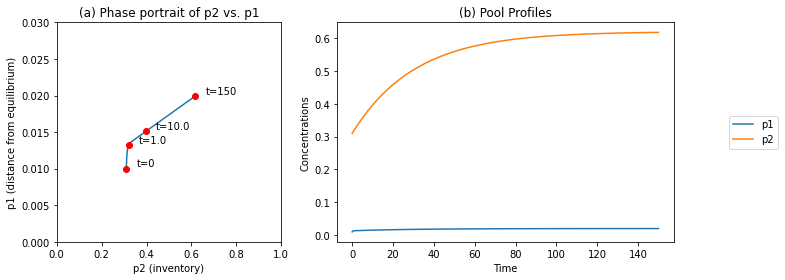

In [8]:
fig_6_4 = plt.figure(figsize=(11, 4))
gs = fig_6_4.add_gridspec(nrows=1, ncols=2, width_ratios=[1, 1.5])

ax1 = fig_6_4.add_subplot(gs[0, 0])
ax2 = fig_6_4.add_subplot(gs[0, 1])

plot_phase_portrait(
    conc_sol, x="p2", y="p1", ax=ax1,
    xlabel="p2 (inventory)", ylabel="p1 (distance from equilibrium)",
    xlim=(0, 1), ylim=(0, 0.03),
    title=("(a) Phase portrait of p2 vs. p1", {"size": "large"}),
    annotate_time_points=[t0, 1e0, 1e1, tf],
    annotate_time_points_color=["red"],
    annotate_time_points_labels=True);

plot_time_profile(
    conc_sol,  observable=["p1", "p2"], ax=ax2, legend="right outside", 
    xlabel="Time", ylabel="Concentrations",
    title=("(b) Pool Profiles", {"size": "large"}));
fig_6_4.tight_layout()

**Figure 6.4:** The time profiles of the pools involved in reaction system $\rightarrow x_1 \rightleftharpoons x_2 \rightarrow$ where the system starts out at equilibrium and the input rate, $b_1$, is changed from 0.01 to 0.02 at time zero. (a) The phase portrait of $p_2$ and $p_1$; (b) The pools as a function of time. Note the small numerical change in $p_1$ relative to $p_2$. Parameter values as in Figures 6.2 and Figure 6.3.

## Michaelis-Menten Kinetics in an Open Environment
We now consider the case when the Michaelis-Menten reaction mechanism operates in an open environment (Figure 6.5). The substrate enters the system and the product leaves. The enzyme stays internal to the system. 

![Figure-6-5](../images/Ch6/Figure-6-5.png)

**Figure 6.5:** The Michaelis-Menten reaction mechanisms in an open setting. The substrate and the product enter and leave the system, while the enzyme stays inside.

### Dynamic description  
The mass action kinetic model is 

$$\begin{align} \frac{ds}{dt} &= b_1 - k_1es + k_{-1}x, \ &s(t=0) &= s_0 &\tag{6.14a} \\ \frac{dx}{dt} &= k_1es - (k_{-1} + k_2)x, \ &x(t=0) &= x_0 &\tag{6.14b}\\ \frac{de}{dt} &= -k_1es + (k_{-1} + k_2)x, \ &e(t=0) &= e_0 &\tag{6.14c} \\ \frac{dp}{dt} &= k_2x + k_3p, \ &p(t=0) &= p_0 &\tag{6.14d} \\ \end{align}$$

The initial conditions would normally be the steady state conditions. The stoichiometric matrix is 

$$\begin{equation} \textbf{S} = \begin{pmatrix} {1} & {-1} & {1} & {0} & {0} \\ {0} & {-1} & {1} & {1} & {0} \\ {0} & {1} & {-1} & {-1} & {0} \\ {0} & {0} & {0} & {1} & {-1} \\ \end{pmatrix} \end{equation}$$
$$\tag{6.15}$$

where $\textbf{x}=(s,\ e, \ x, \ p)$ and $\textbf{v} = (b_1, \ k_1es, \ k_{-1}x, \ k_2x, \ k_3p)$

### The steady state  
As in the previous section, we can compute the steady state fluxes and concentrations. We can also compute how the parameters determine the distance from equilibrium, and here we also run into an additional issue: capacity constraints that result from a conservation quantity. 

#### The steady state fluxes:  
The rank of $\textbf{S}$ is 3, thus the dimension of the null space is 5-3=2. The null space of $\textbf{S}$ is spanned by two vectors, (1,1,0,1,1) and (0,1,1,0,0), that correspond to a pathway through the system and an internal reversible reaction. The steady state fluxes are given by 

$$\begin{align} \textbf{v}_{ss} &= (b_1, \ k_1e_{ss}s_{ss}, \ k_{-1}x_{ss}, \ k_2x_{ss}, \ k_3p_{ss}) \tag{6.16} \\ &= a(1, \ 1, \ 0, \ 1, \ 1) + b(0, 1, 1, 0, 0), \ a \geq 0, \ b \geq 0 \tag{6.17} \\ \end{align}$$


#### The steady state concentrations:  
The dimension of the left null space is 4-3=1. The left null space has one conservation quantity ($e+x$), which can readily be seen from the fact that the second and third row of $\textbf{S}$ add up to zero. The steady state flux balances for this system are 

$$\begin{equation} b_1 = v_1 - v_{-1} = v_2 = v_3 \tag{6.18} \end{equation}$$

Thus, the incoming flux and the kinetic parameters immediately set the concentrations for $X$, $P$, and $E$ as 

$$\begin{equation} x_{ss} = b_1/k_2, \ p_{ss} = b_1/k_3, \ \text{and} \ e_{ss} = e_t - x_{ss} = e_t -  b_1/k_2 \tag{6.19} \end{equation}$$

and the steady state substrate concentration can be determined. The steady state concentration of the substrate is given by $k_1s_{ss}e_{ss} = b_1 + k_{-1}x_{ss}$ that can be solved to give 

$$\begin{equation} s_{ss} = (\frac{k_2}{k_1})(\frac{k_{-1}/k_2 + 1}{e_tk_2/b_1 - 1}) \tag{6.20} \end{equation}$$

The steady state flux vector can now be computed 

$$\begin{align} \textbf{v}_{ss} &= (b_1, \ b_1(k_{-1}/k_2 + 1), \ b_1k_{-1}/k_2, \ b_1, \ b_1) \tag{6.21} \\ &= a(1, \ 1, \ 0, \ 1, \ 1) + b(0, 1, 1, 0, 0), \ a=b_1, \ b=b_1k_{-1}/k_2 \tag{6.22} \\ \end{align}$$

The distance from equilibrium can now be computed as in the previous section. 

#### Internal capacity constraints:  
Since $e_{ss} \geq 0$, the maximum input is 

$$\begin{equation} b_1 \leq b_{1, max} = k_2e_t = v_m \tag{6.23} \end{equation}$$

which is the maximum reaction rate for the Michaelis-Menten mechanism. The total amount of the enzyme and the turnover rate set this flux constraint. 

In [9]:
model = MassModel('Michaelis_Menten_Open')
## Define metabolites
s = MassMetabolite("s")
e = MassMetabolite("e")
x = MassMetabolite("x")
p = MassMetabolite("p")

# Define reactions
b1 = MassReaction("b1", reversible=False)
v1 = MassReaction("v1")
v2 = MassReaction("v2", reversible=False)
v3 = MassReaction("v3", reversible=False)

b1.add_metabolites({s: 1})
v1.add_metabolites({s: -1, e: -1, x: 1})
v2.add_metabolites({x: -1, e: 1, p: 1})
v3.add_metabolites({p: -1})
model.add_reactions([b1, v1, v2, v3])

## Define parameters
b1.kf = 0.025
v1.kf, v1.kr = (1, 0.5)
v2.kf = 0.5
v3.kf = 1

# Set initial conditions for model
s.ic = 1
e.ic = 0.05
x.ic = 0.05
p.ic = 0

# Utilize type 2 rate law for kf and kr parameters defined
model.get_rate_expressions(rate_type=2, update_reactions=True)

# Set a custom rate for b1 to remove substrate concentration dependence
model.add_custom_rate(reaction=b1, custom_rate=b1.kf_str)

In [10]:
t0 = 0
tf = 2e3

sim = Simulation(model, verbose=True)
# Simulate model with disturbance from steady state
conc_sol, flux_sol = sim.simulate(
    model, time=(t0, tf), perturbations={"kf_b1": 0.04},
    interpolate=True, verbose=True)

Successfully loaded MassModel 'Michaelis_Menten_Open' into RoadRunner.
Getting time points
Parsing perturbations
Setting output selections
Setting simulation values for 'Michaelis_Menten_Open'
Simulating 'Michaelis_Menten_Open'
Simulation for 'Michaelis_Menten_Open' successful
Adding 'Michaelis_Menten_Open' simulation solutions to output
Updating stored solutions


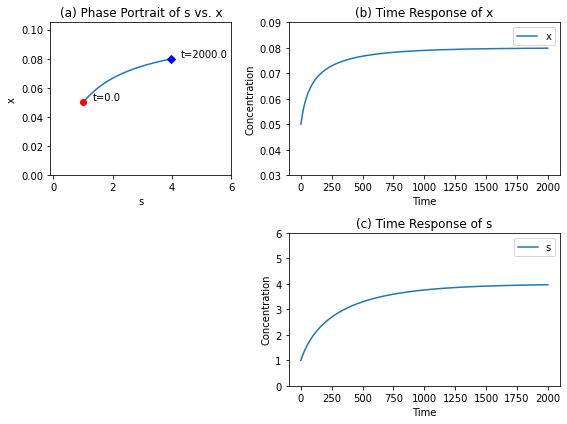

In [11]:
fig_6_6 = plt.figure(figsize=(8, 6))
gs = fig_6_6.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1.5],
                          height_ratios=[1, 1])

ax1 = fig_6_6.add_subplot(gs[0, 0])
ax2 = fig_6_6.add_subplot(gs[0, 1])
ax3 = fig_6_6.add_subplot(gs[1, 1])

plot_phase_portrait(
    conc_sol, x=s, y=x, ax=ax1,
    xlabel=s.id, ylabel=x.id,
    xlim=(-0.1, 6), ylim=(0, 0.105),
    title=("(a) Phase Portrait of s vs. x", {"size":"large"}),
    annotate_time_points="endpoints",
    annotate_time_points_labels=True)

plot_time_profile(
    conc_sol, observable=x, ax=ax2, legend="best",
    ylim=(0.03, 0.09), xlabel="Time", ylabel="Concentration",
    title=("(b) Time Response of x", {"size": "large"}));

plot_time_profile(
    conc_sol, observable=s, ax=ax3, legend="best",
    ylim=(0, 6), xlabel="Time", ylabel="Concentration",
    title=("(c) Time Response of s", {"size": "large"}));
fig_6_6.tight_layout()

**Figure 6.6:** The time profiles for the transient response of the Michaelis-Menten mechanisms for $b_1 = 0.025$ changed to 0.04 at time zero. The kinetic parameters are; $e_t = 0.1$,  $k_1 = 1$, $k_{-1} = 0.5$, $k_2 = 0.5$, $k_3 = 0.1$. (a) The phase portrait of $s$ vs. $x$. (b) The time response of $x$. (c) The time response of $s$.

### Dynamic states for Michaelis-Menten kinetics
The response of this system to a change in the input rate starting from a steady state is of greatest interest, see Figure 6.6. For the kinetic parameters given in the figure, the steady state concentrations of $s$ and $x$ are 1.0 and 0.5 respectively. The input rate is changed from 0.025 to 0.04 at time zero and the concentrations of $s$ and $x$ go to 4.0 and 0.8, respectively, as time goes to infinity. The maximum flux rate is 0.05. 

The change in the input rate triggers an internal motion that basically follows the quasi-steady state line (Figure 6.6c). Figure 6.6b and Figure 6.6c shows that since the internal steps are rapid relative to the exchange rates, there are no rapid transients produced by a perturbation in the input rate. 

If the input is increased towards $v_m$, the substrate concentration builds up to a very high value and most of the enzyme is found in the intermediate state. If the input rate exceeds $v_m$ there will be no steady state as the enzyme cannot convert the substrate to the product at the same rate as it is entering the system. 

The dynamic properties of this open system can be analyzed using pool formation.

## Summary  
* Open systems eventually reach a steady state, which is different from the equilibrium state of a closed system. Such steady states can be thought of as homeostatic, living states. 

* Living cells are open systems that continually exchange mass and energy with their environment. The continual net throughput of mass and concomitant energy dissipation is what allows steady states to form and differentiates them from equilibrium states. 

* The relative rates of the internal network to that of the exchanges across the system boundary are important. Time scale separation between internal and exchange processes can form. Rapid internal transients lead to pool formation. 

* Open systems are most naturally in a steady state and respond to external stimuli. It is normally not possible to suddenly change the internal state of the system since it is in balance with the environment. 

* If the internal dynamics are fast, they do not excite when external stimuli are experienced, and thus accurate information about the fast kinetics may not be needed. It may be enough to know that they are "fast." 

* Non-exchanged moieties form dynamic invariants. They can set internal capacity constraints. 

$\tiny{\text{© B. Ø. Palsson 2011;}\ \text{This publication is in copyright.}\\ \text{Subject to statutory exception and to the provisions of relevant collective licensing agreements,}\\ \text{no reproduction of any part may take place without the written permission of Cambridge University Press.}}$